# Models

In [31]:
import numpy as np
import torch 
import math
import pandas as pd
import matplotlib.pyplot as plt

**Definition**

To allow unbiased comparison between frameworks, the following definition of the MSE loss was used:

\begin{equation}
C = \Sigma \| y(x) - a \| ^2
\end{equation}


## Our framework

In [3]:
df_m1 = pd.read_json("loss_hugo.json")
df_m1.head()

,test_loss
0,0.709653
1,0.706177
2,0.699403
3,0.689369
4,0.675951


## M. Nielsen framework

In [36]:
#df_test = pd.read_json("test.json")
#df_test

In [12]:
n=1000
df_m2 = pd.read_json("all_params.json")
df_m2['train_accuracy'] = df_m2['train_accuracy'] / n
# Solve format problem
#for i in range(len)
#df_m2['test_accuracy'] = df_m2['test_accuracy'][1] / n
df_m2.head()

,train_cost,eval_cost,train_accuracy,test_accuracy
0,0.216555,0.274679,0.684,"[[314], [686]]"
1,0.218216,0.303609,0.684,"[[314], [686]]"
2,0.216287,0.292043,0.684,"[[314], [686]]"
3,0.218150,0.304520,0.684,"[[314], [686]]"
4,0.216550,0.296238,0.684,"[[314], [686]]"


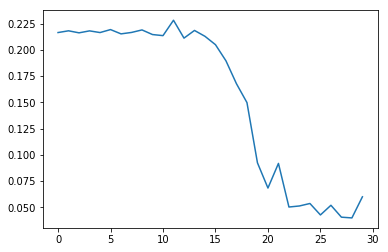

In [22]:
plt.plot(df_m2['train_cost'])

In [18]:
df_m2_2 = pd.read_json("100_epochs_2.json")
df_m2_2.shape

(100, 4)

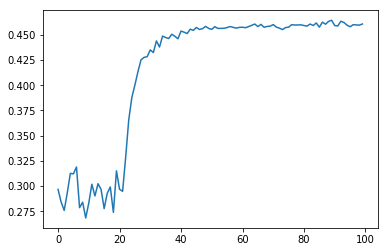

In [20]:
plt.plot(df_m2_2['eval_cost'])

Text(0.5, 1.0, 'Loss evolution during the training')

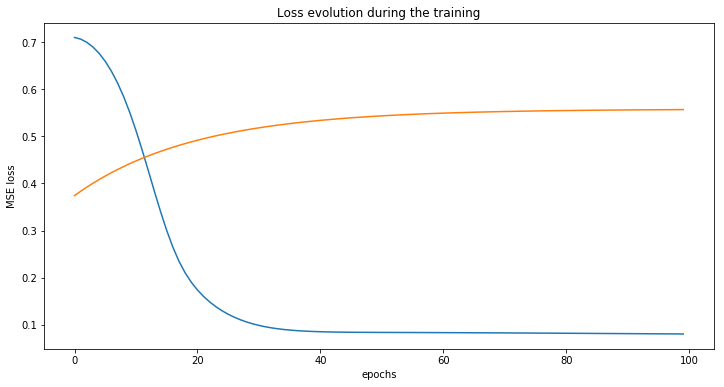

In [11]:
#sample = df_m2['train_accuracy']
#sample = sample[::2]
#plt.plot(df_m2['eval_cost'])
plt.subplots(figsize=(12, 6))
plt.plot(df_m1['test_loss'], label='Framework 1')
plt.plot(df_m2['eval_cost'], label='Framework 2')
plt.xlabel('epochs')
plt.ylabel('MSE loss')
plt.title('Loss evolution during the training')

In [38]:
# 100 epochs
df_100_epochs = pd.read_json("100_epochs.json")
df_100_epochs.head()

,train_cost,eval_cost,train_accuracy,test_accuracy
0,0.208028,0.299017,705,"[[342], [658]]"
1,0.207945,0.285550,705,"[[342], [658]]"
2,0.207669,0.288002,705,"[[342], [658]]"
3,0.212893,0.267446,705,"[[342], [658]]"
4,0.207603,0.299315,705,"[[342], [658]]"


#### PyTorch framework

In [35]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,25)
        self.fc2 = nn.Linear(25,25)
        self.fc3 = nn.Linear(25,25)
        self.fc4 = nn.Linear(25,2)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        return x

In [27]:
def compute_nb_errors(model, input, target, mini_batch_size):
    nb_errors = 0

    for b in range(0, input.size(0), mini_batch_size):
        output = model(input.narrow(0, b, mini_batch_size))
        _, predicted_classes = output.data.max(1)
        for k in range(mini_batch_size):
            if target.data[b + k, predicted_classes[k]] <= 0:
                nb_errors = nb_errors + 1

    return nb_errors

In [28]:
def train_model(model, train_input, train_target, mini_batch_size):
    #mini_batch_size = 100
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 1e-3)
    # optimizer = optim.Adam(model.parameters(), lr = 1e-3)
    nb_epochs = 25

    for e in range(nb_epochs):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            model.zero_grad()
            loss.backward()
            
            sum_loss += loss.item() # compute loss for each mini batch for 1 epoch
            
            optimizer.step()
            
        print('[epoch {:d}] loss: {:0.2f}'.format(e+1, sum_loss))

#### Main

In [29]:
def generate_sets(nb_train = 1000, nb_test = 1000):
    # data
    train_set = torch.Tensor(nb_train, 2).uniform_(0, 1)
    test_set = torch.Tensor(nb_test, 2).uniform_(0, 1)
    # labels
    train_target = train_set.pow(2).sum(1).sub(1 / math.sqrt(2 * math.pi)).sign().add(1).div(2).long()
    test_target = test_set.pow(2).sum(1).sub(1 / math.sqrt(2 * math.pi)).sign().add(1).div(2).long()
    
    return train_set, test_set, train_target, test_target  

In [32]:
train_input, test_input, train_target, test_target = generate_sets()

In [36]:
# Test
mini_batch_size = 10

for k in range(10):
    model = Net()
    train_model(model, train_input, train_target, mini_batch_size)
    nb_test_errors = compute_nb_errors(model, test_input, test_target, mini_batch_size)
    print('test error Net {:0.2f}% {:d}/{:d}'.format((100 * nb_test_errors) / test_input.size(0),
                                                      nb_test_errors, test_input.size(0)))


C:\Users\Gianni\Anaconda3\envs\dl\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[epoch 1] loss: 69.94
[epoch 2] loss: 69.89
[epoch 3] loss: 69.84
[epoch 4] loss: 69.78
[epoch 5] loss: 69.73
[epoch 6] loss: 69.67
[epoch 7] loss: 69.62
[epoch 8] loss: 69.57
[epoch 9] loss: 69.52
[epoch 10] loss: 69.46
[epoch 11] loss: 69.41
[epoch 12] loss: 69.36
[epoch 13] loss: 69.31
[epoch 14] loss: 69.26
[epoch 15] loss: 69.21
[epoch 16] loss: 69.16
[epoch 17] loss: 69.11
[epoch 18] loss: 69.06
[epoch 19] loss: 69.01
[epoch 20] loss: 68.96
[epoch 21] loss: 68.91
[epoch 22] loss: 68.86
[epoch 23] loss: 68.82
[epoch 24] loss: 68.77
[epoch 25] loss: 68.72


IndexError: too many indices for tensor of dimension 1